# Задание

Данные по клиентам заархивированы в формате zip - сразу их разархивируем. Для этого нам понадобится библиотека zipfile.

In [59]:
import zipfile
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [40]:
with zipfile.ZipFile('../datasets/client_info.csv.zip', 'r') as zip_ref:
    zip_ref.extractall('../datasets')

FileNotFoundError: [Errno 2] No such file or directory: '../datasets/client_info.csv.zip'

In [41]:
df = pd.read_csv('../datasets/client_info.csv')

In [42]:
df.head(5)

,ID,CR_PROD_CNT_IL,AMOUNT_RUB_CLO_PRC,APP_REGISTR_RGN_CODE,TURNOVER_DYNAMIC_IL_1M,LDEAL_YQZ_COM_GROUP,LDEAL_YQZ_CHRG_GROUP,AVG_PCT_MONTH_TO_PCLOSE_GROUP,MAX_PCLOSE_DATE_GROUP,AVG_PCT_DEBT_TO_DEAL_AMT_GROUP,...,CLNT_SETUP_TENOR,TURNOVER_DYNAMIC_PAYM_3M,TURNOVER_DYNAMIC_PAYM_1M,TRANS_AMOUNT_TENDENCY3M,TRANS_CNT_TENDENCY3M,REST_DYNAMIC_CC_1M,TURNOVER_DYNAMIC_CC_1M,REST_DYNAMIC_CC_3M,TURNOVER_DYNAMIC_CC_3M,TARGET
0,146841,0,0.000000,неизвестна,0.0,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,...,1.593023,0.0,0.0,0.483032,0.406780,0.0,0.0,0.0,0.0,0
1,146842,0,0.041033,неизвестна,0.0,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,...,1.587647,0.0,0.0,0.394340,0.545455,0.0,0.0,0.0,0.0,0
2,146843,0,0.006915,неизвестна,0.0,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,...,1.587647,0.0,0.0,0.399342,0.297297,0.0,0.0,0.0,0.0,0
3,146844,0,0.000000,неизвестна,0.0,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,...,1.583333,0.0,0.0,0.552169,0.558824,0.0,0.0,0.0,0.0,0
4,146845,0,0.000000,неизвестна,0.0,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,...,1.583333,0.0,0.0,0.611610,0.620690,0.0,0.0,0.0,0.0,0


## Задание 1
Назначь колонку `ID` индексом таблицы.

In [43]:
df.set_index('ID', inplace=True)
df.head(5)

,CR_PROD_CNT_IL,AMOUNT_RUB_CLO_PRC,APP_REGISTR_RGN_CODE,TURNOVER_DYNAMIC_IL_1M,LDEAL_YQZ_COM_GROUP,LDEAL_YQZ_CHRG_GROUP,AVG_PCT_MONTH_TO_PCLOSE_GROUP,MAX_PCLOSE_DATE_GROUP,AVG_PCT_DEBT_TO_DEAL_AMT_GROUP,LDEAL_AMT_MONTH_GROUP,...,CLNT_SETUP_TENOR,TURNOVER_DYNAMIC_PAYM_3M,TURNOVER_DYNAMIC_PAYM_1M,TRANS_AMOUNT_TENDENCY3M,TRANS_CNT_TENDENCY3M,REST_DYNAMIC_CC_1M,TURNOVER_DYNAMIC_CC_1M,REST_DYNAMIC_CC_3M,TURNOVER_DYNAMIC_CC_3M,TARGET
ID,,,,,,,,,,,,,,,,,,,,,
146841,0,0.000000,неизвестна,0.0,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,...,1.593023,0.0,0.0,0.483032,0.406780,0.0,0.0,0.0,0.0,0
146842,0,0.041033,неизвестна,0.0,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,...,1.587647,0.0,0.0,0.394340,0.545455,0.0,0.0,0.0,0.0,0
146843,0,0.006915,неизвестна,0.0,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,...,1.587647,0.0,0.0,0.399342,0.297297,0.0,0.0,0.0,0.0,0
146844,0,0.000000,неизвестна,0.0,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,...,1.583333,0.0,0.0,0.552169,0.558824,0.0,0.0,0.0,0.0,0
146845,0,0.000000,неизвестна,0.0,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,...,1.583333,0.0,0.0,0.611610,0.620690,0.0,0.0,0.0,0.0,0


## Задание 2
Определимся, что является нашим `X`, а что является нашим `Y`. 
Для этого изучи документ, описывающий [датасет](../datasets/datadata_description.docs).
Признаки сохрани в переменную `X`. А целевую переменную, которую мы будем предсказывать, в переменную `Y`
Выведи размерность этих таблиц

In [44]:
Y = df['TARGET']
X = df.drop('TARGET', axis=1)
Y.shape
X.shape

(355190, 103)

## Задание 3
Изначальный датасет содержит в себе как количественные, так и категориальные переменные. Раздели датасет. 
В этом поможет тип данных колонки. Категориальные переменные сохрани в переменную `X_cat`, а количественные в `X_num`. 
Выведи число категориальных и количественные переменных.

In [45]:
X_cat = X.select_dtypes('object')
X_num = X.select_dtypes(('int64', 'float64'))
X_cat.shape[1]
X_num.shape[1]

47

## Задание 4
Предобработаем количественные переменные. Проведи стандартизацию для признаков X_num.
Сохрани результат стандартизации в переменную `X_num_scal`. 
Выведи среднее и стандартное отклонение по датасету для каждого признака после стандартизации. 
Значения округли для сотых.

In [57]:
X_num_scal = pd.DataFrame(StandardScaler().fit_transform(X_num), columns=X_num.columns.tolist())
round(X_num_scal.std(axis=0), 2)
round(X_num_scal.mean(axis=0), 2)

CR_PROD_CNT_IL             -0.0
AMOUNT_RUB_CLO_PRC         -0.0
TURNOVER_DYNAMIC_IL_1M      0.0
AMOUNT_RUB_SUP_PRC          0.0
REST_DYNAMIC_FDEP_1M        0.0
REST_DYNAMIC_SAVE_3M        0.0
CR_PROD_CNT_VCU            -0.0
REST_AVG_CUR               -0.0
AMOUNT_RUB_NAS_PRC          0.0
TRANS_COUNT_SUP_PRC         0.0
TRANS_COUNT_NAS_PRC         0.0
CR_PROD_CNT_TOVR           -0.0
CR_PROD_CNT_PIL            -0.0
TURNOVER_CC                 0.0
TRANS_COUNT_ATM_PRC         0.0
AMOUNT_RUB_ATM_PRC         -0.0
TURNOVER_PAYM              -0.0
AGE                         0.0
CR_PROD_CNT_CC             -0.0
REST_DYNAMIC_FDEP_3M       -0.0
REST_DYNAMIC_IL_1M         -0.0
CR_PROD_CNT_CCFP           -0.0
REST_DYNAMIC_CUR_1M         0.0
REST_AVG_PAYM               0.0
LDEAL_GRACE_DAYS_PCT_MED   -0.0
REST_DYNAMIC_CUR_3M         0.0
CNT_TRAN_SUP_TENDENCY3M    -0.0
TURNOVER_DYNAMIC_CUR_1M     0.0
REST_DYNAMIC_PAYM_3M        0.0
SUM_TRAN_SUP_TENDENCY3M    -0.0
REST_DYNAMIC_IL_3M          0.0
CNT_TRAN

## Задание 5
Алгоритмы машинного обучения плохо работают с meanегориальными пstdнаками, поэтому их надо трансформировать. 
Прочитай про One-Hot Encoding подход к кодированию и примени его с нашим категориальным признаком, сохрани 
результат в переменную `X_cat_ohe`
Перед этим удали признак `CLNT_JOB_POSITION` (у него слишком много значений).
Выведи количество колонок таблицы `X_cat_ohe`

In [70]:
X_cat.drop(["CLNT_JOB_POSITION"], axis=1, inplace=True)
X_cat_ohe = OneHotEncoder().fit_transform(X_cat).toarray()
X_cat_ohe.shape[1]

323

## Задание 6
Объедини 2 предобработанных датасета. Результат запиши в переменную `X_ready`. Сохрани датасет в папку `datasets/data_prepared.csv`
Подели получившийся датасет на `train` и `test`. Процент тестовой выборки: `20%`. Использовать параметр `random_state=21`.
Выведи размерность обучающей выборки X_train.


In [72]:
X_ready = pd.concat((X_num_scal,X_cat_ohe), axis=1)
X_ready.to_csv('../datasets/data_prepared.csv')
X_train, X_test, Y_train, Y_test = train_test_split(X_ready, Y, random_state=21, train_size=0.80)
X_train.shape

(284152, 370)

## Задание 7 
Обучи логистическую регрессию с параметрами: `solver='liblinear'`, `fit_intercept=False`, `penalty='l1'`, `random_state=21`. 
Посчитай `accuracy` модели на тестовой выборке, сравнив предсказанные значения с реальными.
Выведи значение `accuracy` модели на тестовой выборке.

In [74]:
clf = LogisticRegression(solver='liblinear', fit_intercept=False, penalty='l1', random_state=21).fit(X_train, Y_train)
accuracy = clf.score(X_test, Y_test)
accuracy

0.9197612545398237

## Задание 8
Посчитай процент клиентов в тестовой выборке, у которых индикатор оттока равен `0`, и сравнить с `accuracy`.
Тебе что-то должно показаться подозрительным)

In [75]:
(Y_test.value_counts()[0] / Y_test.shape[0]) * 100

91.96064078380584

## Задание 9
Построй график, на котором видны топ-10 самых важных факторов по мнению модели в абсолютном значении.

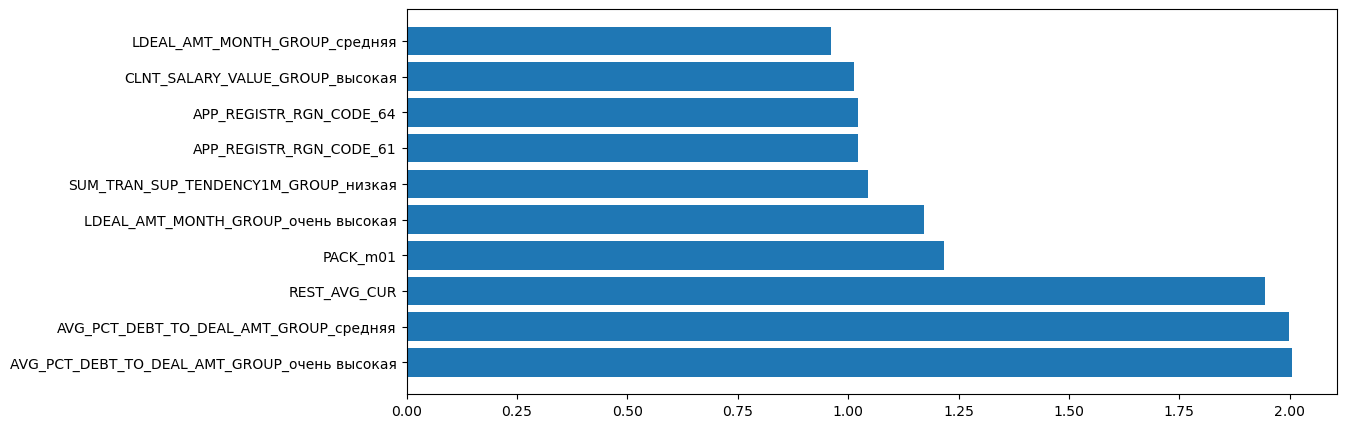

In [77]:
def f_importances(weights, names, top=-1):
    weights, names = zip(*sorted(list(zip(weights, names))))

    # Show all features
    if top == -1:
        top = len(names)
    plt.figure(figsize=(12, 5))
    plt.barh(range(top), weights[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])

f_importances(np.absolute(clf.coef_[0]), X_ready.columns, 10)